Initializing the notebook:

In [1]:
import os
import numpy as np
from functions import *

# Get the directory where the current script is located
script_directory = os.getcwd()

# Change the current working directory to the script's directory
os.chdir(script_directory)

# Now the CWD is the same as the script's directory
print("New Current Working Directory:", os.getcwd())

New Current Working Directory: /Users/behradmoadeli/Documents/PhD/behrads_papers/reports


# System Model

Initially, only the equation for one state (temperature or concentration) will be considered. For simplicity, the domain will be $[0,1]$, with Danckwerts boundary conditions:

$$\left\{\begin{array}{l} \dot{x} = D\partial_{\zeta\zeta} x -v\partial_{\zeta} x +kx\\
D\partial_\zeta x(0,t)-vx(0,t)=-v[Rx(1,t-\tau)+(1-R)u(t-\tau_I)] \\
\partial_\zeta x(1,t)=0 \\
y(t)=x(1,t-\tau_O)
  \end{array}\right. $$

This model considers that the input is applied in the reactor's entrance, which is mixed with the recycle from the outlet. Input, output, and state delays are considered and represented by $\tau_I,\tau_O$, and $\tau$, respectively. 

## Eigenvalue Analysis

The eigenvalue problem, defined as $A\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi -v\partial_{\zeta} \phi +k\phi\\
\lambda\psi=\dfrac{1}{\tau}\partial_{\zeta}\psi\\
D\partial_\zeta \phi(0)-v\phi(0)=-Rv\psi(0) \\
\partial_\zeta \phi(1)=0 \\
\psi(1)=\phi(1)\\
  \end{array}\right. $$

where $\Phi=[\phi,\,\psi]^T$, with $\phi$ as the state eigenfunction and $\psi$ as the eigenfunction related to the delay. By defining $X=[\phi,\, \partial_{\zeta}\phi,\,\psi]^T$, the following system of ODEs is obtained:

$$
\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{v}{D} & 0\\0 & 0 & \tau\lambda\end{bmatrix}X=ΛX \\
DX_2(0)-vX_1(0)=-RvX_3(0) \\
X_2(1)=0 \\
X_3(1)=X_1(1)\\ \end{array}\right.
$$

## Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda \zeta} X (\zeta=0, \lambda) \\ \overset{\zeta = 1}{\Rightarrow} X(1, \lambda) = e^{\Lambda} X (\zeta=0) $$

Now, let's assume:

$$ e^{\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(1) = q_1 X_1(0) + q_2 X_2(0) + q_3 X_3(0) \\
X_2(1) = q_4 X_1(0) + q_5 X_2(0) + q_6 X_3(0) \\
X_3(1) = q_7 X_1(0) + q_8 X_2(0) + q_9 X_3(0)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2-vx_1=-Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(0)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ \bar{A} = \begin{bmatrix}
-v & D & Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix}; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set its determinant equal to zero. Doing so and further simplifying the result will give the characteristic equation as following:
$$
\begin{align*}
    &\frac{e^{(\lambda t+\frac{v}{2D})}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}(v^2+2D^2)}{\sqrt{v^2-4D\left(k-\lambda\right)}}\\
    -& \frac{v\sqrt{v^2-4D\left(k-\lambda\right)}\left(Re^{(\frac{v}{D})}-\cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}\right)}{\sqrt{v^2-4D\left(k-\lambda\right)}} = 0
\end{align*}
$$

The denominator is the same on both sides. Therefore, we solve for the numerators first to obtain a potential solutoin:

$$
\begin{align*}
    &e^{(\lambda t+\frac{v}{2D})}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}(v^2+2D^2)\\
    - &v\sqrt{v^2-4D\left(k-\lambda\right)}\left(Re^{(\frac{v}{D})}-\cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}\right) = 0
\end{align*}
$$

and then check the following:

1. The denominator does not go to zero close to the obtained solution. In this case, the potential solution is a solution for the original equation.
2. The denominator goes to zero close to the obtained solution. In this case, the following must be checked:

$$
\begin{equation}
    e^{(\lambda t+\frac{v}{2D})}\left(D+2\left(k-\lambda\right)\right) - v\left(Re^{(\frac{v}{D})}-1\right) = 0
\end{equation}
$$

which is the $\lim_{\lambda \rightarrow \lambda_0}\frac{N(\lambda)}{D(\lambda)}$, where $\lambda_0$ is the potential solution. $\lambda_0$ is the solution to the original equation only if the above expression holds true.

## Numerical Solution

Initializing system parameters:

In [3]:
default_pars = obtain_default_pars('pars_list.csv')
display(default_pars)

{'k': 5, 'D': 0.3, 'v': 3, 'tau': 0.1, 'R': 0.5, 'label': 'default'}

Searching `guess` range to obtain eigenvalues distribution:

In [4]:
if not os.path.exists('CSV/default.csv'):
    guess = {
        'guess_range_real':[-275,25,30],
        'guess_range_imag':[0,500,40]
    }
    save_dataframe_to_csv(*find_eig(default_pars, **guess, round_sig_digits=3), 'CSV')
else:
    print("Solution has already been saved in the appropriate location.")

Solution has already been saved in the appropriate location.


Plotting the obtained eigenvalue distribution:

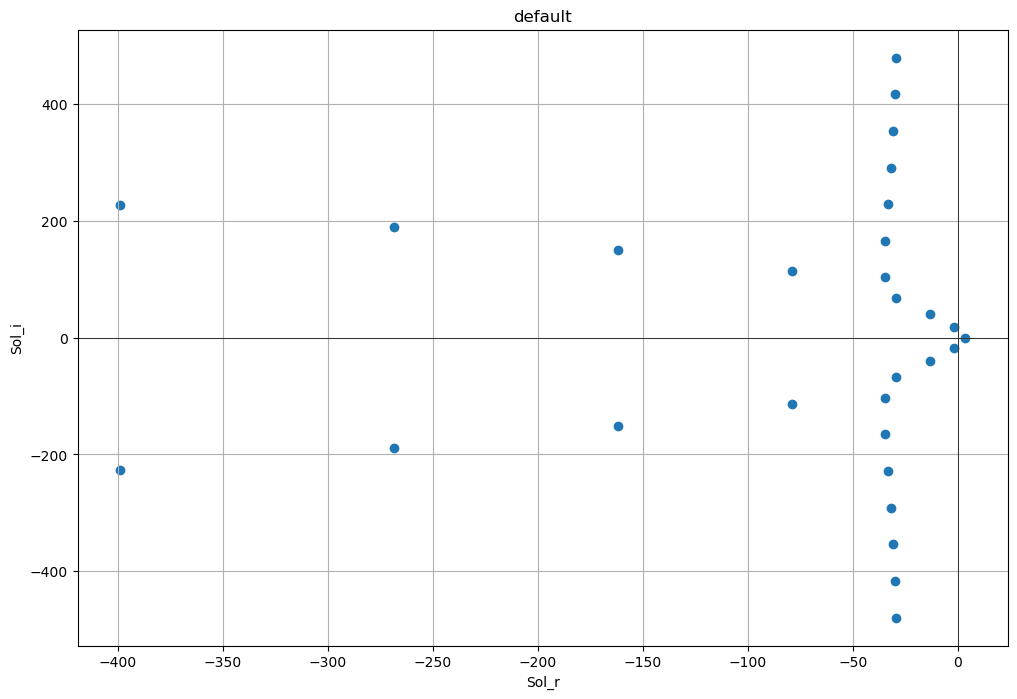

{'par': {'k': 5; 'D': 0.3; 'v': 3; 'tau': 0.1; 'R': 0.5; 'label': 'default'}; 'guess_range': ([-275; 25; 30]; [0; 500; 40]); 'tols': (1e-09; 0.05; 3)}


,Sol_r,Sol_i,Guess,g(x),ier,msg,infodict,instances
0,3.609,0.00,[-6.03448276 0. ],1.455192e-11,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-1., 0.],\n ...",182
1,-1.606,17.65,[-26.72413793 12.82051282],9.761721e-11,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.94969779, -0.31...",27
2,-1.606,-17.65,[ -1.6056808 -17.65071346],9.761721e-11,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.94969779, 0.31...",27
3,-13.300,40.80,[-16.37931034 38.46153846],2.118791e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9029871 , -0.42...",27
4,-13.300,-40.80,[-13.30007156 -40.8031539 ],2.118791e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9029871 , 0.42...",27
5,-29.400,-479.40,[ -29.4022831 -479.37318401],1.634284e-02,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.04840703, -0.99...",13
6,-29.400,479.40,[-37.06896552 474.35897436],1.634284e-02,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.04840703, 0.99...",13
7,-29.480,67.83,[-37.06896552 64.1025641 ],1.746230e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9327918 , -0.36...",20
8,-29.480,-67.83,[-29.48245245 -67.83051303],1.746230e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9327918 , 0.36...",20
9,-30.100,-416.60,[ -30.10105588 -416.59181694],5.803156e-03,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.97862943, -0.20...",14


In [5]:
df, label, metadata = plot_single_df(
        'CSV/default.csv', filter=False,
        real_lower_bound=-200, real_upper_bound=10, imag_lower_bound=-300, imag_upper_bound=300
)
display(df)

We can check the hyperbolic curve to see if it is converging to a negative value:

In [6]:
filtered_df = df.loc[(df['Sol_r']>-50) & (df['Sol_i']>105),['Sol_r', 'Sol_i']]
filtered_df['slope'] = np.zeros_like(filtered_df['Sol_r'])
filtered_df.sort_values(by='Sol_i')
for i in range(1,len(filtered_df)):
    s = (
        (filtered_df.iloc[i-1,0] - filtered_df.iloc[i,0]) *100/ 
        (filtered_df.iloc[i-1,1] - filtered_df.iloc[i,1])
    )
    s_percent = str(f"{np.round(s,1)}%")
    filtered_df.iloc[i,2] = s_percent
filtered_df.sort_values(by='Sol_i', ascending=True).reset_index(drop=True)

,Sol_r,Sol_i,slope
0,-34.68,165.9,2.6%
1,-33.07,228.4,1.9%
2,-31.88,291.1,1.5%
3,-30.91,353.8,1.3%
4,-30.10,416.6,1.1%
5,-29.40,479.4,0.0


As we can see, the difference between the real part of two consecutive eigenvalues of the hyperbolic region goes to zero as the imaginary part of those eigenvalues grow. In addition, the real part of all of these eigenvalues are well below zero. Hence, we can state that the real part of hyperbolic eigenvalues converge in the negative region as the imaginary part grows. Now we may move forward to the next step, where we determine which eigenvalues are mainly contributing to the dynamics of the system.

## Obtaining Eigenfunctions

Having obtained the eigenvalues of the open-loop system, we may go ahead and find the eigenfunction corresponding to each eigenvalue. To do so, we plug in the eigenvalue into the eigenvalue problem and form a system of ODE's. Solving the resulting system will give the eigenvalue's corresponding eigenfunction. We start by 3 eigenvalues with largest real parts. These values are stored in `lambdas` as follows:

In [7]:
lambdas = []
for index, row in df.head(3).iterrows():
    lambdas.append(complex(row['Sol_r'], row['Sol_i']))
    
display(lambdas)
    

[(3.609+0j), (-1.606+17.65j), (-1.606-17.65j)]

which is:

$$\left\{\begin{array}{l}
\lambda_1 &=& &3.609 &+& 0j &\\
\lambda_2 &=& -&1.606 &+& 17.65j &\\
\lambda_3 &=& -&1.606 &-& 17.65j &\\
\end{array}\right. $$

The problem of finding the eigenfunctions is now reduced to solving a system of linear ODEs  for each $\lambda_{i}$, containing a first order and a second order ODE.

$$\left\{\begin{array}{l}
D\partial_{\zeta\zeta} \phi &-v\partial_{\zeta} \phi &+(k-\lambda) \phi &= 0 &\\
\, \\
&\dfrac{1}{\tau}\partial_{\zeta}\psi &- \lambda\psi &= 0 &\\
\end{array}\right. $$

It can be proven that the resulting characteristic equation for the second order ODE will always have 2 distinct roots as long as $\lambda \neq -2.5$. Therefore, the general form of the required eigenfunction looks like the following:

$$\left\{\begin{array}{l}
\phi_{i}(\zeta) =& a e^{r_{1}\zeta} + b e^{r_{2}\zeta} &\\
\psi_{i}(\zeta) =& c e^{\tau \lambda \zeta} &\\
\end{array}\right. $$

where $a, b,$ and $c$ are unknown coefficients that can be determined by applying boundary conditions. Also, $r_{1,2}$, the roots of the second order ODE, shall obtained as follows:

$$
{r_{1,2}}_i = \frac{v \pm \sqrt{v^2+4D\left(\lambda_i-k\right)}}{2D} \quad \text{for } i=1,2,3
$$

Applying the following boundary conditions:

$$\left\{\begin{array}{l}
D \partial_{\zeta} \phi (0) - v \phi (0) &=& -R v \psi (0) \\
\, \\
\partial_{\zeta} \phi (1) &=& 0 \\
\, \\
\phi(1) &=& \psi(1) \\
\end{array}\right. $$

will result in the following system of linear algebraic equations that can ive us the coefficients $a, b,$ and $c$:

$$\left\{\begin{array}{l}
D ( a r_1 + b r_2) - v (a + b) &=& -Rvc \\
\, \\
a r_1 e^{r_1} + b r_2 e^{r_2} &=& 0 \\
\, \\
a e^{r_1} + b e^{r_2} &=& c e^{\tau \lambda} \\
\end{array}\right.$$

The above system of algebraic equation is rank deficient, resulting in one of the coefficient to be equal to $\frac{0}{0}$. Here, we decided to keep `b` and obtain `a`, `c` as functions of `b`:

$$\begin{align*}
\begin{cases}
a = -\frac{r_2 e^{r_2}}{r_1 e^{r_1}}b \\
\, \\
c = e^{r_2 - \tau \lambda}(1-\frac{r_2}{r_1}) b\\
\end{cases}
\end{align*}
$$

The third equation will be redundant, as shown below:

$$\begin{align*}
b \times \Bigl(g(\lambda_i)\Bigr) = 0
\end{align*}
$$

where $g(\lambda_i)$ is the charecteristic equation of the operator $\hat{A}$, and is always equal to zero. Therefore, the third equation will give:

$$\begin{align*}
b \times 0 = 0 \Rightarrow b = \frac{0}{0}
\end{align*}
$$

which is expected according to the explanation above.

Thus, each set of eigenfunctions $[\phi_i, \psi_i]^T$ will be obtained after solving the above system of equations for their correspoding eigenvalue $\lambda_i$, with a normalization coefficient remaining to be calculated, i.e. `b` in this case:
$$
\begin{align*}
\Rightarrow \begin{cases}
\phi_{i}(\zeta) =& [e^{r_{2}(\zeta-1)} - (\frac{r_2}{r_1}) e^{r_{1}(\zeta-1)}]b e^{r_{2}}&\\
\, \\
\psi_{i}(\zeta) =& (1-\frac{r_2}{r_1}) b e^{r_2 + \tau \lambda (\zeta - 1)} &\\
\end{cases}
\end{align*}
$$


To obtain the normalization coefficient, we first need to see whether or not the operator $\hat{A}$ is self-adjoint. This will be done by calculating ${\hat{A}}^{*}$ and then checking if $\hat{A} = {\hat{A}}^{*}$:

$$
\begin{align*}
    &\begin{cases}
        &\hat{A} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) -v\partial_{\zeta} (.) +k(.) & 0 \\
            0 & \dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \phi(0)-v\phi(0)=-Rv\psi(0) \\
            \partial_\zeta \phi(1)=0 \\
            \psi(1)=\phi(1)
        \end{cases}
    \end{cases}\\
    \, \\
    <\hat{A} \Phi, \Psi> = <\Phi, {\hat{A}}^{*} \Psi> \Rightarrow
    &\begin{cases}
        &{\hat{A}}^{*} (.) =
        &\begin{bmatrix}
            D\partial_{\zeta\zeta} (.) +v\partial_{\zeta} (.) +k(.) & 0\\
            0 & \dfrac{1}{\tau}\partial_{\zeta} (.)
        \end{bmatrix} \\
        \, \\
        &B.C. \quad : \quad &\begin{cases}
            D\partial_\zeta \phi^{*}(1)+v\phi^{*}(1)=-Rv\psi^{*}(1) \\
            \partial_\zeta \phi^{*}(0)=0 \\
            \psi^{*}(0)=\phi^{*}(0)
        \end{cases}
    \end{cases}
    \Rightarrow \hat{A} \neq {\hat{A}}^{*}
\end{align*}
$$

Therefore, operator $\hat{A}$ is not self adjoint. In this case, the normalization coeficient may be obtained using the following theorem:

### (To Do: Put bi-orthonormal theorem)

Before doing so, we need to make sure if $\hat{A}$ and $\hat{A}^*$ share the same set of eigenvalues. This is done by obtaining and solving the characteristics equation for $\hat{A}^*$ as follows:

### Adjoint Eigenvalue Analysis

The eigenvalue problem, defined as $\hat{A}^*\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi +v\partial_{\zeta} \phi +k\phi\\
\lambda\psi=\dfrac{1}{\tau}\partial_{\zeta}\psi\\
D\partial_\zeta \phi(1)+v\phi(1)=-Rv\psi(1) \\
\partial_\zeta \phi(0)=0 \\
\psi(0)=\phi(0)\\
  \end{array}\right. $$

where $\Phi=[\phi,\,\psi]^T$, with $\phi$ as the state eigenfunction and $\psi$ as the eigenfunction related to the delay. By defining $X=[\phi,\, \partial_{\zeta}\phi,\,\psi]^T$, the following system of ODEs is obtained:

$$
\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{-v}{D} & 0\\0 & 0 & \tau\lambda\end{bmatrix}X=ΛX \\
DX_2(1)+vX_1(1)=-RvX_3(1) \\
X_2(0)=0 \\
X_3(0)=X_1(0)\\ \end{array}\right.
$$

### Adjoint Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda (\zeta-\zeta=1)} X (\zeta=1, \lambda) \\ \overset{\zeta = 0}{\Rightarrow} X(0, \lambda) = e^{-\Lambda} X (\zeta=1) $$

Now, let's assume:

$$ e^{-\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(0) = q_1 X_1(1) + q_2 X_2(1) + q_3 X_3(1) \\
X_2(0) = q_4 X_1(1) + q_5 X_2(1) + q_6 X_3(1) \\
X_3(0) = q_7 X_1(1) + q_8 X_2(1) + q_9 X_3(1)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2+vx_1=-Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(1)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ \bar{A} = \begin{bmatrix}
-v & D & Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix}; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

# (To Do: Check symbolic adj char eq in MATLAB)

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set its determinant equal to zero. Doing so and further simplifying the result will give the characteristic equation as following:

$$
\begin{align*}
    &\frac{e^{(\lambda t+\frac{v}{2D})}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}(v^2+2D^2)}{\sqrt{v^2-4D\left(k-\lambda\right)}}\\
    -& \frac{v\sqrt{v^2-4D\left(k-\lambda\right)}\left(Re^{(\frac{v}{D})}-\cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}\right)}{\sqrt{v^2-4D\left(k-\lambda\right)}} = 0
\end{align*}
$$

The denominator is the same on both sides. Therefore, we solve for the numerators first to obtain a potential solutoin:

$$
\begin{align*}
    &e^{(\lambda t+\frac{v}{2D})}\sinh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}(v^2+2D^2)\\
    - &v\sqrt{v^2-4D\left(k-\lambda\right)}\left(Re^{(\frac{v}{D})}-\cosh{(\frac{\sqrt{v^2-4D\left(k-\lambda\right)}}{2D})}\right) = 0
\end{align*}
$$

and then check the following:

1. The denominator does not go to zero close to the obtained solution. In this case, the potential solution is a solution for the original equation.
2. The denominator goes to zero close to the obtained solution. In this case, the following must be checked:

$$
\begin{equation}
    e^{(\lambda t+\frac{v}{2D})}\left(D+2\left(k-\lambda\right)\right) - v\left(Re^{(\frac{v}{D})}-1\right) = 0
\end{equation}
$$

which is the $\lim_{\lambda \rightarrow \lambda_0}\frac{N(\lambda)}{D(\lambda)}$, where $\lambda_0$ is the potential solution. $\lambda_0$ is the solution to the original equation only if the above expression holds true.